In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/raw/mtcars.csv")
df.head(5)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
df = df.set_index("model")
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
df.mean(axis = 1 )

model
Mazda RX4              29.907273
Mazda RX4 Wag          29.981364
Datsun 710             23.598182
Hornet 4 Drive         38.739545
Hornet Sportabout      53.664545
Valiant                35.049091
Duster 360             59.720000
Merc 240D              24.634545
Merc 230               27.233636
Merc 280               31.860000
Merc 280C              31.787273
Merc 450SE             46.430909
Merc 450SL             46.500000
Merc 450SLC            46.350000
Cadillac Fleetwood     66.232727
Lincoln Continental    66.058545
Chrysler Imperial      65.972273
Fiat 128               19.440909
Honda Civic            17.742273
Toyota Corolla         18.814091
Toyota Corona          24.888636
Dodge Challenger       47.240909
AMC Javelin            46.007727
Camaro Z28             58.752727
Pontiac Firebird       57.379545
Fiat X1-9              18.928636
Porsche 914-2          24.779091
Lotus Europa           24.880273
Ford Pantera L         60.971818
Ferrari Dino           34.508182
Mase

In [5]:
df.median(axis = 1)

model
Mazda RX4              4.000
Mazda RX4 Wag          4.000
Datsun 710             4.000
Hornet 4 Drive         3.215
Hornet Sportabout      3.440
Valiant                3.460
Duster 360             4.000
Merc 240D              4.000
Merc 230               4.000
Merc 280               4.000
Merc 280C              4.000
Merc 450SE             4.070
Merc 450SL             3.730
Merc 450SLC            3.780
Cadillac Fleetwood     5.250
Lincoln Continental    5.424
Chrysler Imperial      5.345
Fiat 128               4.000
Honda Civic            4.000
Toyota Corolla         4.000
Toyota Corona          3.700
Dodge Challenger       3.520
AMC Javelin            3.435
Camaro Z28             4.000
Pontiac Firebird       3.845
Fiat X1-9              4.000
Porsche 914-2          4.430
Lotus Europa           4.000
Ford Pantera L         5.000
Ferrari Dino           6.000
Maserati Bora          8.000
Volvo 142E             4.000
dtype: float64

In [6]:
df.mode(axis = 0)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,10.4,8.0,275.8,110.0,3.07,3.44,17.02,0.0,0.0,3.0,2.0
1,15.2,NaN,NaN,175.0,3.92,NaN,18.90,NaN,NaN,NaN,4.0
2,19.2,NaN,NaN,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,22.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,30.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# IQR

$$
IQR = Q3 - Q1 
$$

In [7]:
IQR = df.mpg.quantile(0.75) - df.mpg.quantile(0.25)

print("IQR:", IQR)

IQR: 7.375


In [8]:
lower = df.mpg.quantile(0.25) - 1.5 * IQR
upper = df.mpg.quantile(0.75) + 1.5 * IQR

print(lower, upper)

4.362500000000001 33.8625


In [12]:
for i, car in enumerate(df["mpg"]):
    if car < lower or car > upper:
        print("Outlier", i, car, df.iloc[i].name)

Outlier 19 33.9 Toyota Corolla


In [13]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


<Axes: >

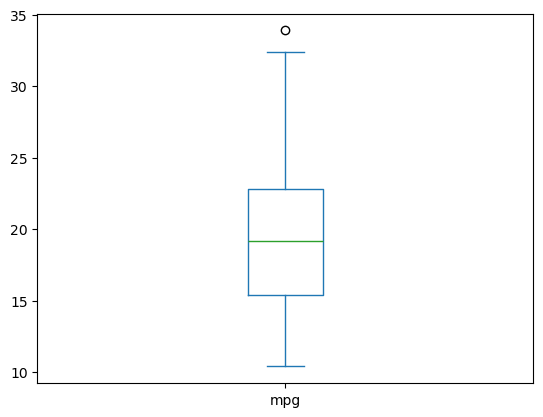

In [17]:
df["mpg"].plot(kind=  "box")

<Axes: ylabel='Frequency'>

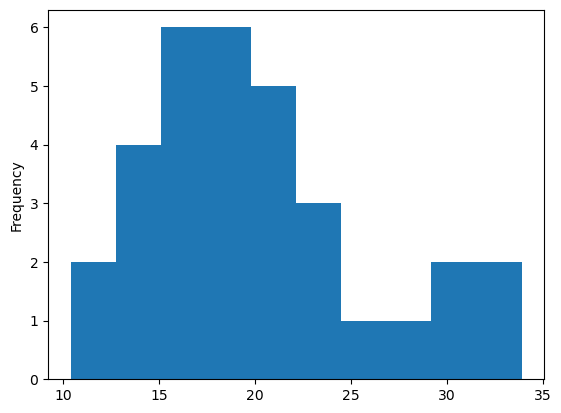

In [19]:
df.mpg.plot(kind= "hist")

In [21]:
df.mpg.skew()

0.6723771376290805

In [26]:
df.kurt()

mpg    -0.022006
cyl    -1.762794
disp   -1.067523
hp      0.275212
drat   -0.450432
wt      0.416595
qsec    0.864931
vs     -2.063273
am     -1.966550
gear   -0.895292
carb    2.020059
dtype: float64